# Introduction to Python - Lesson 2

### Recap

Last lesson we looked at

* `print` statements and variables
* Mathematical expressions
    * Also importing functions from a module (specifically the `log` and `exp` functions from the `math` module)
* Boolean expressions
* String expressions
* Indentation, `if/elif/else` blocks and `for` loops
* Lists
* Dictionaries

### Overview

Now we're going to look at 
* Last week's exercises
* Tuples
* Dates
* Functions and modules - writing your own
* Get started with a bit of finance

## Exercises

In [1]:
# Exercise 1

# write code which, given the following list a,
# prints out the indices of every occurrence of y

a = [3, 5, 2, 1, 13, 5, 5, 1, 3, 4]
y = 5

##### Solution #####

for i, x in enumerate(a):
    if x == y:
        print(i)

1
5
6


In [2]:
# Exercise 2

# given the following variables, write out the Black Scholes formula
# and save the value of a call in a variable named 'call_price' and the 
# value of a put in a variable named 'put_price'

s = 800  #Â spot price of the underlying
k = 600  # strike price
vol = 0.25  # volatility
r = 0.01  # interest rate
ttm = 0.5  # time to maturity, in years

# you'll need the Gaussian cumulative distribution function
# you can import it from the 'scipy.stats' module
from scipy.stats import norm

# then you use it like this
norm.cdf(0.123)


##### Solution #####
# validated against http://www.soarcorp.com/black_scholes_calculator.jsp

from math import log,exp
from scipy.stats import norm

d1 = (log(s / k) + (r + 0.5 * vol ** 2) * ttm) / (vol * ttm ** 0.5)
d2 = (log(s / k) + (r - 0.5 * vol ** 2) * ttm) / (vol * ttm ** 0.5)
call_price = s * norm.cdf(d1) - k * exp(-r * ttm) * norm.cdf(d2)   
put_price = k * exp(-r * ttm) * norm.cdf(-d2) - s * norm.cdf(-d1)
print(call_price, put_price)

205.472472554 2.47996006964


In [3]:
# Exercise 3

# given the following dictionary mapping currencies to
# 2-year zero coupon bond prices, build another dictionary mapping
# the same currencies the corresponding annualized interest rates

from math import exp
d = {
    'EUR': 0.98,
    'CHF': 1.005,
    'USD': 0.985,
    'GBP': 0.97
}

##### Solution #####

# initialize an empty dictionary in which to store the result
r = {}

# loop over all the keys: 'EUR', 'CHF', 'USD', 'GBP'
for currency in d.keys():
    
    # get the discount factor from the input dictionary for this currency
    discount_factor = d[currency]
    
    # calculate the rate and store it in the output dictionary
    r[currency] = ((1 / discount_factor ) ** 0.5) - 1

    
# Or, the following code does the same thing but with less code
    
r = {
    currency: ((1 / d[currency]) ** 0.5) - 1
    for currency in d.keys()
}


# Or, instead of looping over the keys, we can loop directly over key-value pairs
# to avoid having to access the discount factors using `d[currency]`

# Still produces the same result in the end

r = {
    currency: ((1 / df) ** 0.5) - 1
    for currency, df in d.items()
}


# The result
r

{'CHF': -0.002490663892367073,
 'EUR': 0.010152544552210818,
 'GBP': 0.015346165133619083,
 'USD': 0.007585443719756668}

## Tuples

Tuples create a bit of confusion for beginners because they're very similar to lists, but they have some subtle conceptual differences. Nonetheless, tuples do appear when programming in Python, so it's important to know about them.

Like lists, tuples are sequences of any type of object. Unlike lists, they are *immutable*. This means that:
* Once constructed, they cannot be changed - i.e. you cannot append, insert or delete elements
* Because they are immutable, they can be used as dictionary keys (lists cannot)

In [4]:
# constructing a tuple
t = (1, 2, 3)
t

(1, 2, 3)

In [5]:
# accessing elements is the same as with a list
print("Length: %s" % (len(t)))
print("First element: %s" % (t[0]))
print("First element: %s" % (t[-1]))

Length: 3
First element: 1
First element: 3


In [6]:
# another way of accessing the elements is to 'unpack' the tuple
# this works with lists too, by the way
x, y, z = (1, 2, 3)
print(x)
print(y)
print(z)

1
2
3


In [7]:
# empty tuple
t = tuple()
t

()

In [8]:
# tuple with one element
t = (1,)
t

(1,)

In [9]:
# to add elements, you need to build a new tuple
t1 = (1, 2, 3)
t2 = t1 + (4, 5)
t2

(1, 2, 3, 4, 5)

In [10]:
# but they can be used as dictionary keys
d = {
    ('Finance', 1): 'Room 8',
    ('Finance', 2): 'Room 3',
    ('Math', 1): 'Room 6',
    ('Programming', 1): 'IT room'
}
d

{('Finance', 1): 'Room 8',
 ('Finance', 2): 'Room 3',
 ('Math', 1): 'Room 6',
 ('Programming', 1): 'IT room'}

## Dates

Dates are not usually included in standard beginner Python tutorials, however for finance they're pretty essential.

In Python, the standard `date` class lives in the `datetime` module. We're also going to import `relativedelta` from the `dateutil.relativedelta` module, which allows us to add/subtract days/months/years to dates.

In [11]:
from datetime import date
from dateutil.relativedelta import relativedelta

In [12]:
date.today()

datetime.date(2016, 11, 3)

In [13]:
date.today() + relativedelta(months=2)

datetime.date(2017, 1, 3)

In [14]:
date.today() - relativedelta(days=3)

datetime.date(2016, 10, 31)

In [15]:
one_day = relativedelta(days=1)
date.today() - 3 * one_day

datetime.date(2016, 10, 31)

In [16]:
one_month = relativedelta(months=2)
date.today() + 2 * one_month

datetime.date(2017, 3, 3)

In [17]:
# we can also difference dates to calculate the number of days between them

d1 = date(2017, 1, 1)
d2 = date(2017, 1, 10)
(d2 - d1).days

9

In [18]:
# converting a date to string
str(d1)

'2017-01-01'

In [19]:
# if we want to control the way it looks - check out the docs for more details
d1.strftime("%Y-%b-%d (%a)")

'2017-Jan-01 (Sun)'

In [20]:
# going the other way is a bit more complicated but still not too bad
# to do it we need to use another object, 'datetime'
from datetime import datetime
datetime.strptime('11 Feb 2018', "%d %b %Y").date()

datetime.date(2018, 2, 11)

In [21]:
d1.weekday()  # 0 = Monday, ..., 6 = Sunday

6

## Functions

In [22]:
# what does this function do?

def my_function(n):
    x = 0
    for i in range(1, n+1):
        x += i
    return x

In [23]:
my_function(5)

15

In [24]:
# functions can call other functions, and return any type
def my_function_2(n, x):
    return "The result is: " + str(my_function(n) * x)

In [25]:
my_function_2(5, 10)

'The result is: 150'

In [26]:
# functions can call themselves too - this is called recursion

def factorial(n):
    if n <= 1:
        return 1
    else:
        return n * factorial(n-1)

Note: here we are exploiting the fact that
$$
\begin{align}
n! &= n \times (n-1)! & \forall n &> 1 \\
n! &= 1 & \forall n &\leq 1
\end{align}
$$

In [27]:
factorial(4)

24

In [28]:
# functions can accept and return any type

def squares(xs):
    return {
        x: x ** 2
        for x in xs
    }

squares([5, 11, 6])

{5: 25, 6: 36, 11: 121}

In [29]:
# functions arguments can have default values

def powers(xs, n=2, c=0):
    return {
        x: x ** n + c
        for x in xs
    }

In [30]:
powers([5, 11, 6])

{5: 25, 6: 36, 11: 121}

In [31]:
powers([5, 11, 6], 3)

{5: 125, 6: 216, 11: 1331}

In [32]:
# it's possible to override (i.e. replace) some but not other default arguments by using 'keyword arguments'
# clearly this is useful when, for example, you only want to override the last argument but not the ones before it
powers([5, 11, 6], c=1000)

{5: 1025, 6: 1036, 11: 1121}

## Discount curve interpolation

Now we're going to try putting together what we've seen so far to write a function which interpolates some given discount factors.

The input data will be:

* A list of pillar dates specifying the value dates of the given discount factors, $t_0, ... , t_{n-1}$
* A list of given discount factors $D(t_0), ..., D(t_{n-1})$
* A pricing date ('today' date) which corresponds to $t = 0$

The input argument to the function will be:

* The value date at which we want to interpolate the discount factor.

The output of the function will be the log-linearly interpolated discount factor.

We'll use log-linear interpolation:

$$
D(t) = \exp\left\{ (1-w) \log D(t_i) + w \log D(t_{i+1}) \right\} 
\qquad w = \frac{t-t_i}{t_{i+1} - t_i}
$$

where $i$ is such that $t_i \leq t \leq t_{i+1}$.

To perform the linear interpolation we'll use the function `numpy.interp` so let's start by looking at that.

In [33]:
# let's assume we have a list 'xp' of x-axis coordinates,
# and the corresponding values 'fp' of a function evaluated at those x coordinates.
xp = [1, 2, 3]
fp = [0.3, 0.4, 0.6]

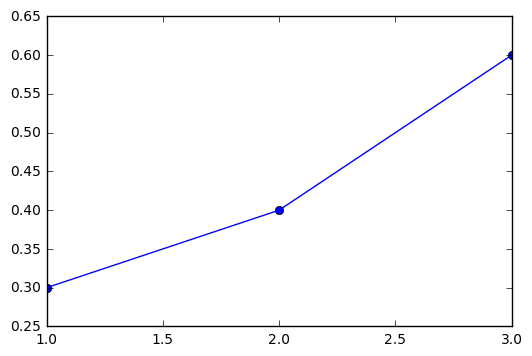

In [34]:
# let's see what this looks like when plotted on a graph
from matplotlib import pyplot as plt
plt.plot(xp, fp, marker='o')
plt.show()

In [35]:
# the numpy.interp function linearly interpolates these points to
# estimate the value of f at other x coordinates

# for example, say we wanted to interpolate the points at the coordinate x = 2.5
# the two surrounding points are x = 2 and x = 3, so the interpolated f value is f(2.5) = 0.5

# using numpy.interp we calculate this like so:
import numpy
numpy.interp(2.5, xp, fp)

0.5

Now back to our discount factor function `df`. Let's start by importing the modules we need and defining some input data, and making a first attempt at writing the function.

In [36]:
# import modules and objects that we need
from datetime import date
import numpy
import math

# define the input data

today_date = date(2016, 1, 1)

pillar_dates = [
    date(2016, 1, 1),
    date(2017, 1, 1),
    date(2018, 1, 1)
]

discount_factors = [
    1.0,
    0.95,
    0.8
]


# define the df function
def df(d):
    
    # first thing we need to do is to apply the logarithm function to the discount factors
    # since we are doing log-linear interpolation, not just linear interpolation
    log_discount_factors = [ math.log(discount_factor) for discount_factor in discount_factors ]

    # perform the linear interpolation of the log discount factors
    interpolated_log_discount_factor = numpy.interp(d, pillar_dates, log_discount_factors)
    
    # return the interpolated discount factor
    return math.exp(interpolated_log_discount_factor)

This is almost OK, but it won't work because `numpy.interp` only accepts numbers / lists of numbers as arguments - it does not automatically convert or interpret dates as numbers in any way, so it doesn't know how to 'interpolate' them.

So we need to do the conversion ourselves before passing the data into the `numpy.interp` function.

In [37]:
# define the df function
def df(d):
    
    # first thing we need to do is to apply the logarithm function to the discount factors
    # since we are doing log-linear interpolation, not just linear interpolation
    log_discount_factors = [ math.log(discount_factor) for discount_factor in discount_factors ]
    
    # convert the pillar dates to pillar 'days', i.e. number of days from today
    pillar_days = [ (pillar_date - today_date).days for pillar_date in pillar_dates ]
    
    # obviously we need to do the same to the value date argument of the df function
    d_days = (d - today_date).days

    # perform the linear interpolation of the log discount factors
    interpolated_log_discount_factor = numpy.interp(d_days, pillar_days, log_discount_factors)
    
    # return the interpolated discount factor
    return math.exp(interpolated_log_discount_factor)

In [38]:
# now we can use the df function to get discount factors on value dates between the
# given pillar dates

df(date(2016, 6, 1))

0.9789231547109155

In [39]:
df(date(2017, 6, 1))

0.88480543087241